In [1]:
## Goal: Explore data w/ visualizations for Player Stats dataset 

# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math

%matplotlib inline  
# Start of magic command which configures execution environment, to display graphics w/in notebook

In [2]:
# Load already prepared dataset, display shape, & explore first 10 rows of Pandas data frame

Pstats = pd.read_csv('Raptors2020PlayerStatsR.csv', header=0)
print(Pstats.shape)
Pstats.head(5)

(160, 53)


,Player,Game,Unit_Position,Position_Group,Position,Result,Games_Played,Minutes_Played,Meters,Involvements,...,Scrum_Involvement,Scrum_Attended,Scrum_Retained,Atk_Scrum_pct,Lineout_Involvement,Lineout_Attended,Lineout_Retained,Lineout_pct,Lineout_Stolen,Lineout_Disrupted
0,Aladdin Schirmer,1,Forward,Back Row,Flanker,Loss,1.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ata Malifa,1,Back,Flyhalf,Flyhalf,Loss,1.0,24.0,3420,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Blake Rogers,1,Forward,Front Row,Prop,Loss,1.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brendan Daly,1,Forward,Second Row,Lock,Loss,1.0,70.0,5708,50.0,...,11.0,6.0,5.0,0.83,15.0,16.0,13.0,0.81,NaN,NaN
4,Campbell Johnstone,1,Back,Center,Center,Loss,1.0,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Pstats.dtypes

Player                  object
Game                     int64
Unit_Position           object
Position_Group          object
Position                object
Result                  object
Games_Played           float64
Minutes_Played         float64
Meters                   int64
Involvements           float64
Involve-Min            float64
Meter-Involve          float64
Pos_Involv             float64
Pos_Involv-Min         float64
Pos_Involv_pct         float64
Neg_Involv             float64
Live_Reload            float64
Dead_Reload            float64
Pass                   float64
Tips_Pass              float64
Axe_Ball               float64
Offload                float64
Try_Assist             float64
Carry                  float64
Gainline_Carry         float64
Linebreak              float64
Defender_Beaten        float64
Tackle                 float64
Positive_Tackle        float64
Neutral_Tackle         float64
Negative_Tackle        float64
Missed_Tackle          float64
Attack_R

In [4]:
# Compute & display frequency table for categorical variables w/pandas value_counts

def count_unique(Pstats, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(Pstats[col].value_counts())
        
cat_cols = ['Player', 'Unit_Position','Position_Group', 'Position', 'Result', 'Jackal', 'Conversion_Made', 'Penalty_Made',
            'Scrum_Attended', 'Scrum_Retained', 'Atk_Scrum_pct', 'Lineout_Attended', 'Lineout_Retained', 'Lineout_pct',
            'Lineout_Stolen', 'Lineout_Disrupted']
count_unique(Pstats, cat_cols)


For column Player
Sakaria Taulafo       5
Xendy Tatibouet       5
Sam Slade             5
Blake Rogers          5
Rene Ranger           5
Nick Johnson          5
Chad Gough            5
Carlo DeNysschen      5
Jacob Finau           5
Ata Malifa            5
Tomas Quinlan         5
Mateo Gadsden         5
Connor Cook           5
Brendan Daly          5
Michael Stewart       5
Dakota Oneil          5
Mika Kruse            5
Aladdin Schirmer      5
Marco Fepuleai        5
Ryan James            5
Chad London           5
Michael Curry         5
Nicklas Boyer         5
John Ryberg           5
Sean Yacoubian        5
Digby Ioane           5
Mason Emerson         5
Robert Petzer         5
Seth Halliman         5
Kelepi Fifita         5
Luke White            5
Campbell Johnstone    5
Name: Player, dtype: int64

For column Unit_Position
Forward    75
Back       70
Name: Unit_Position, dtype: int64

For column Position_Group
Front Row     35
Back Three    25
Center        20
Second Row    20
Bac

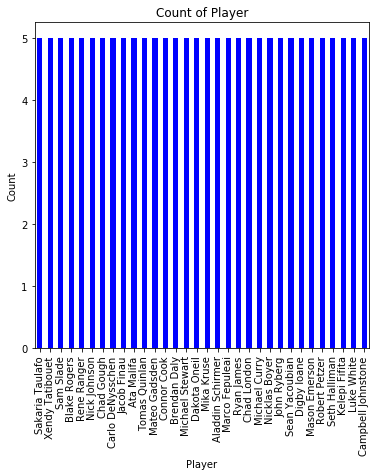

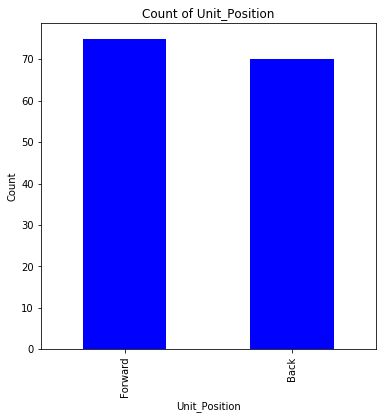

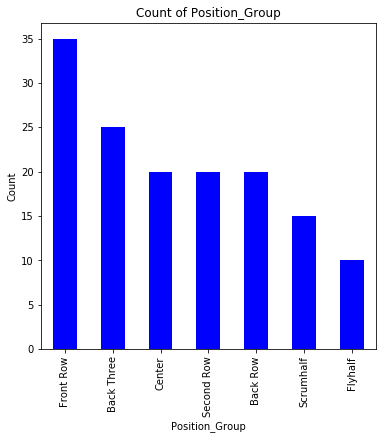

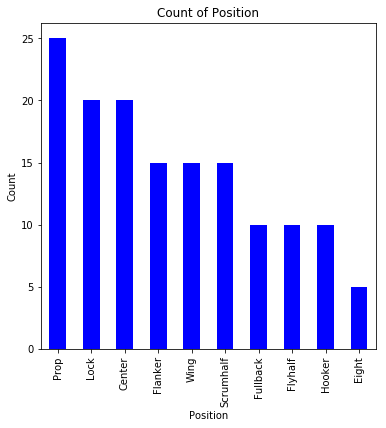

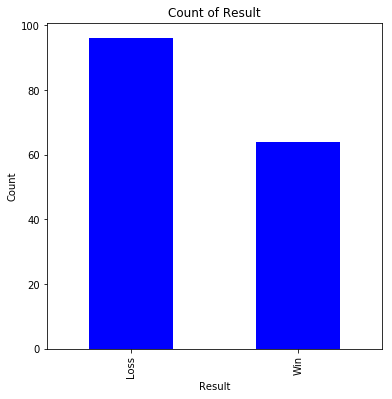

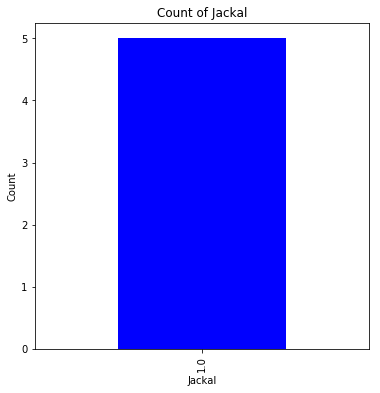

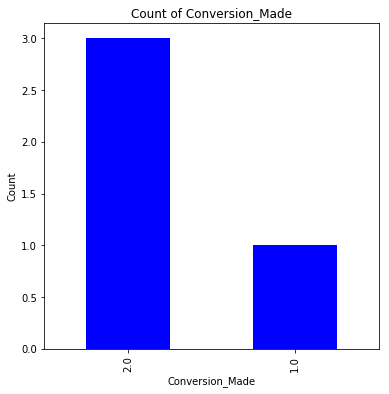

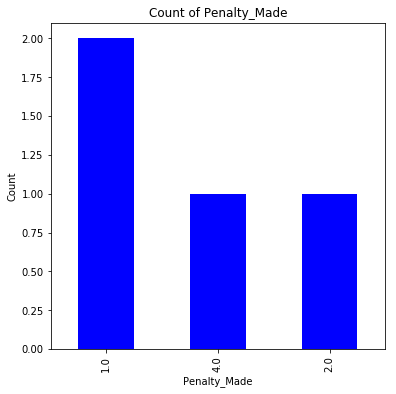

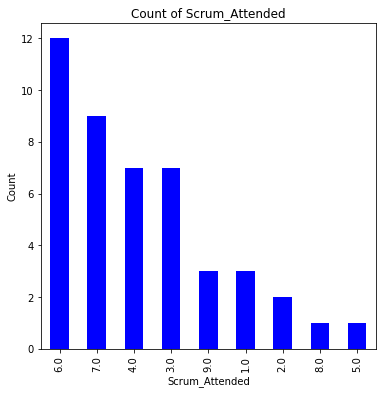

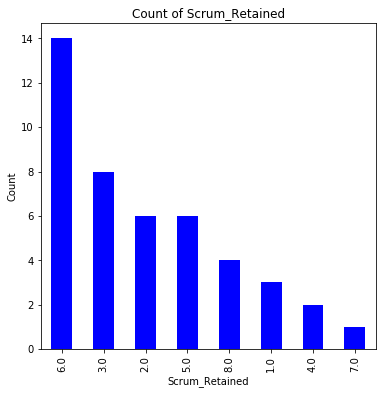

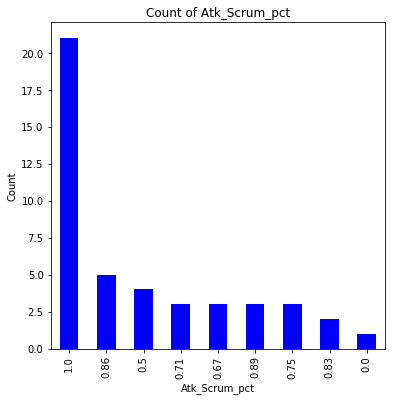

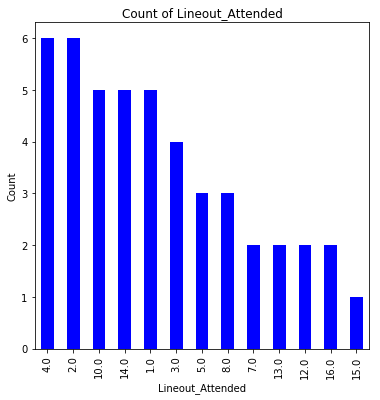

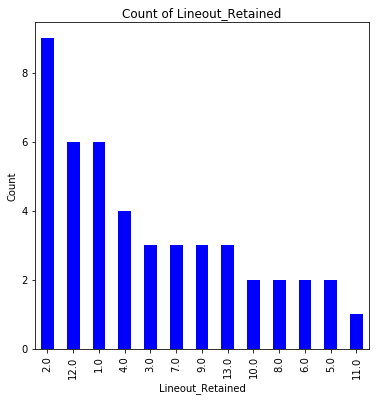

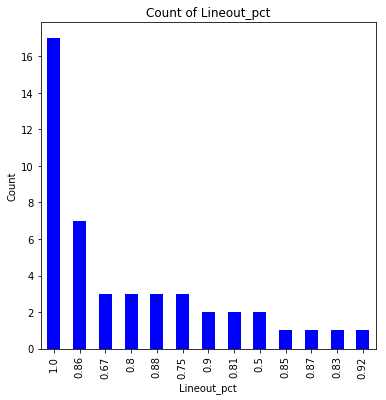

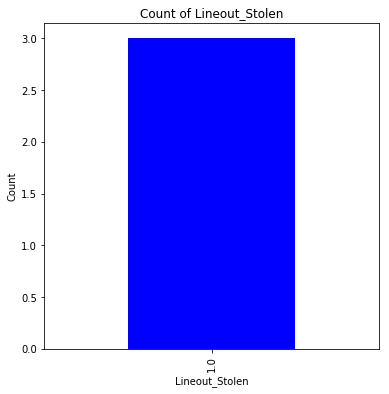

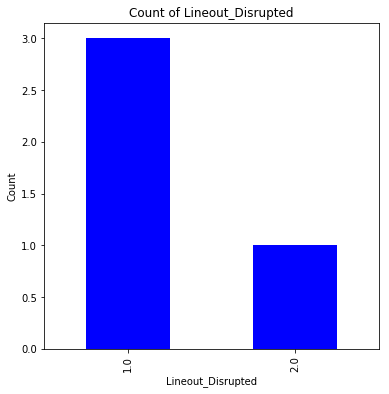

In [5]:
## Visualize distributions w/ 1 Dimensional Plots
# Step 1- Visualize frequency distributions of categorical variables w/ pandas Bar Chart plot.bar

def plot_bars(Pstats, cols):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        counts = Pstats[col].value_counts()    # Find counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue')    # Use plot.bar method from pandas on counts data frame
        ax.set_title('Count of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Count')   # Set y-axis label w/ matplotlib
        plt.show()
        
cat_cols = ['Player', 'Unit_Position','Position_Group', 'Position', 'Result', 'Jackal', 'Conversion_Made', 'Penalty_Made',
            'Scrum_Attended', 'Scrum_Retained', 'Atk_Scrum_pct', 'Lineout_Attended', 'Lineout_Retained', 'Lineout_pct',
            'Lineout_Stolen', 'Lineout_Disrupted']

plot_bars(Pstats, cat_cols)

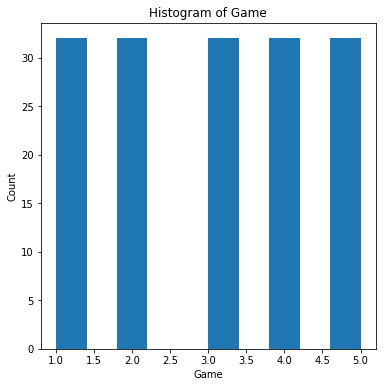

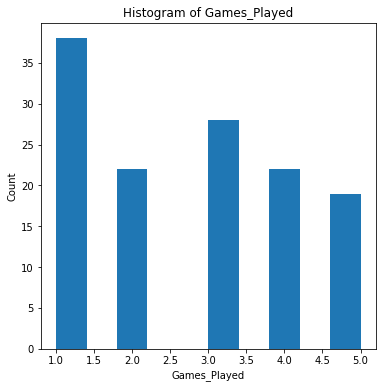

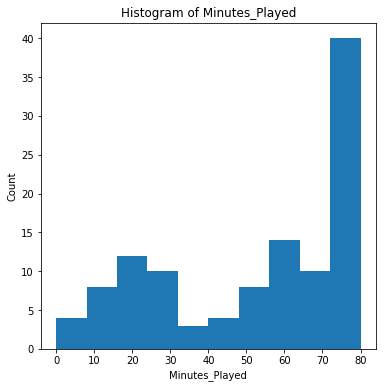

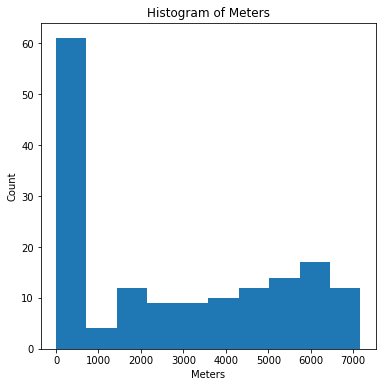

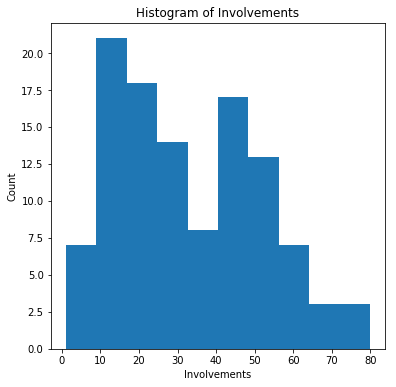

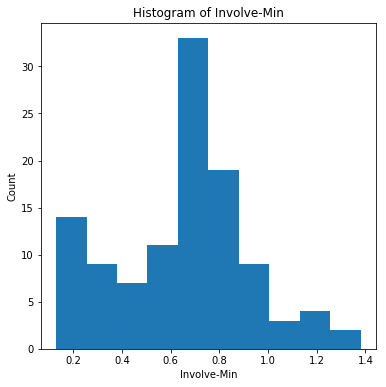

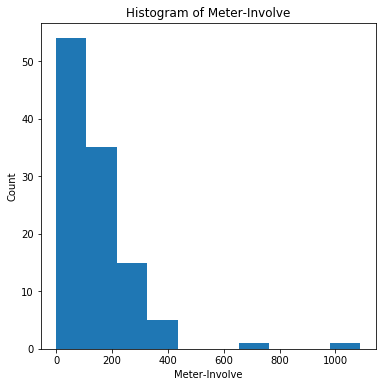

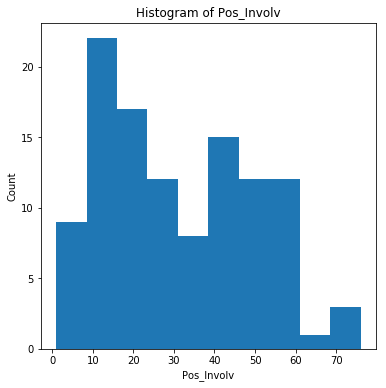

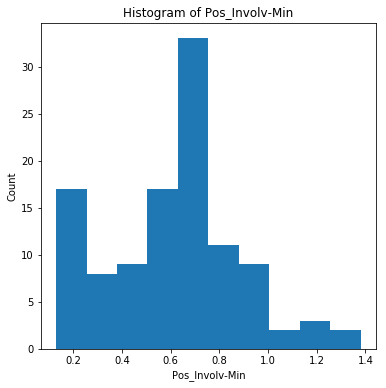

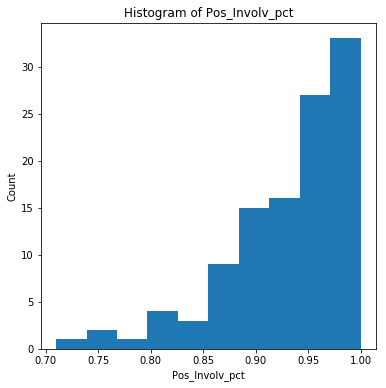

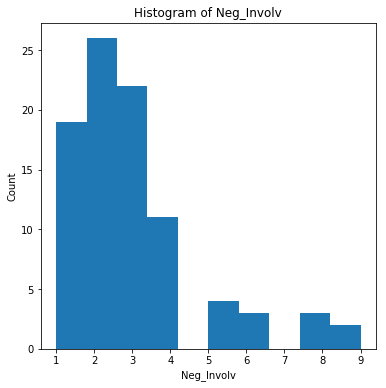

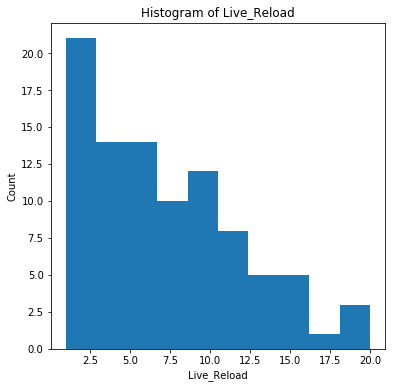

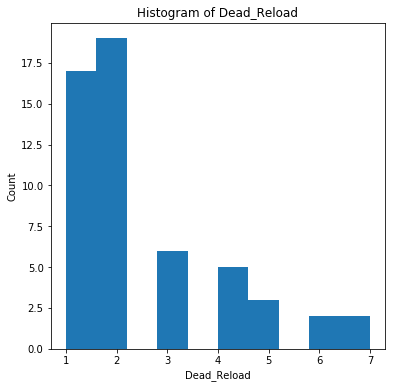

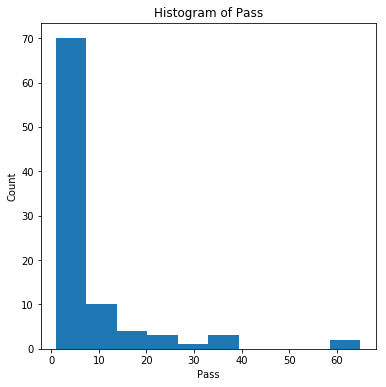

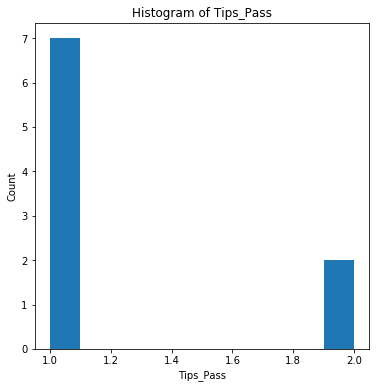

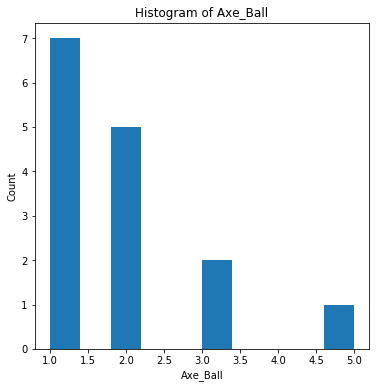

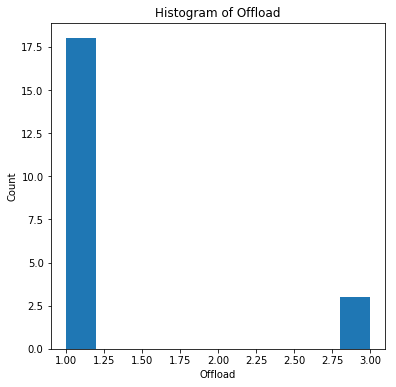

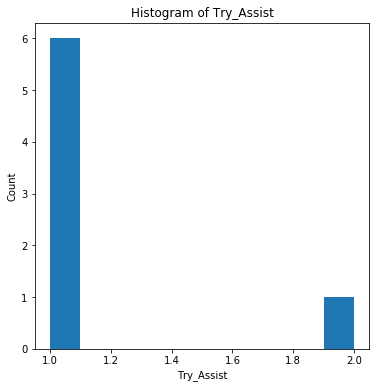

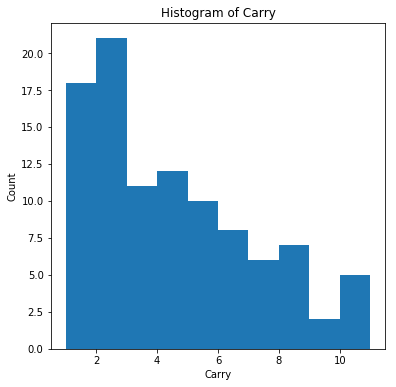

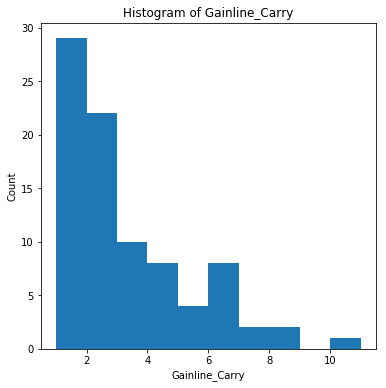

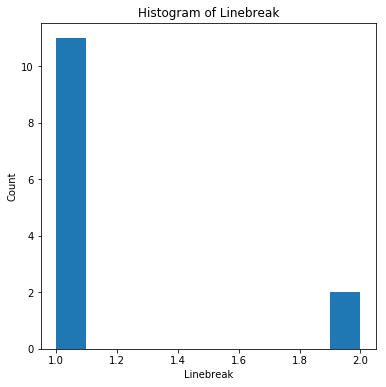

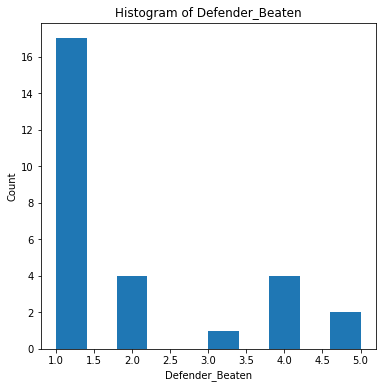

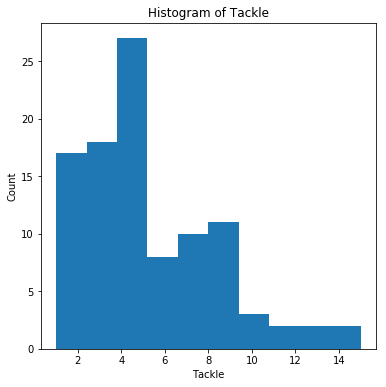

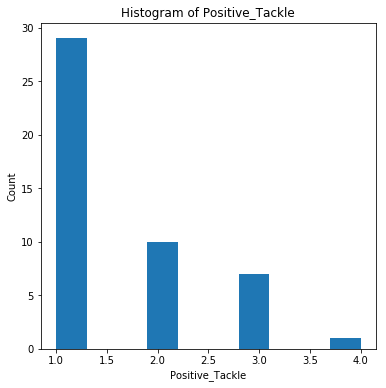

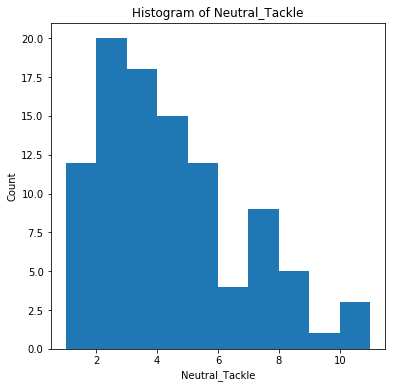

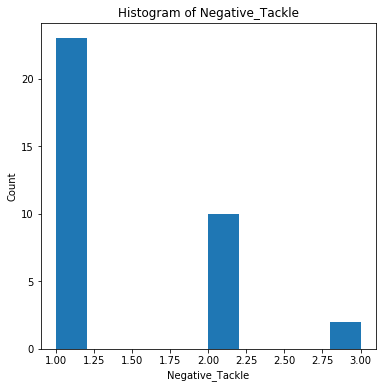

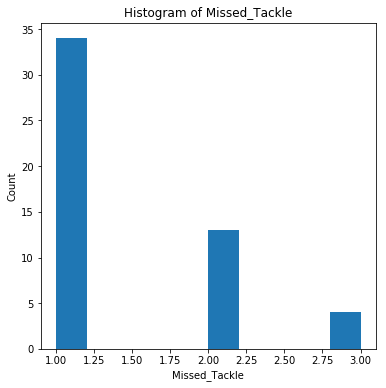

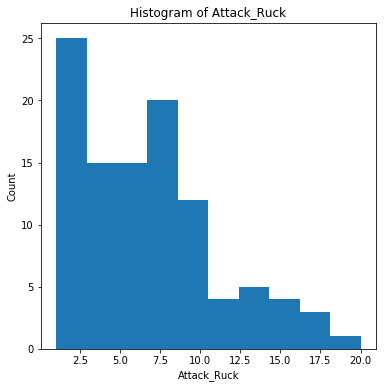

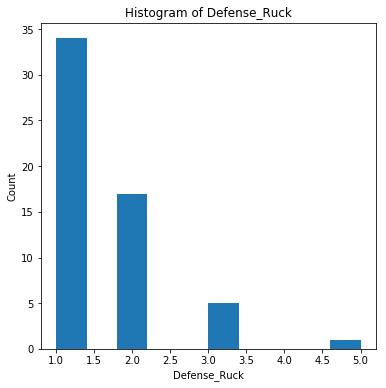

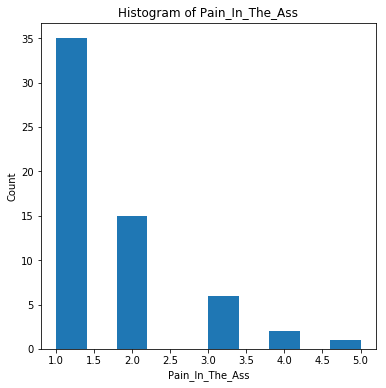

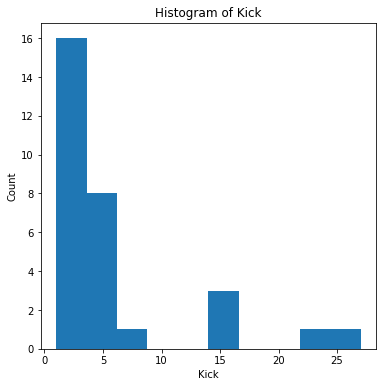

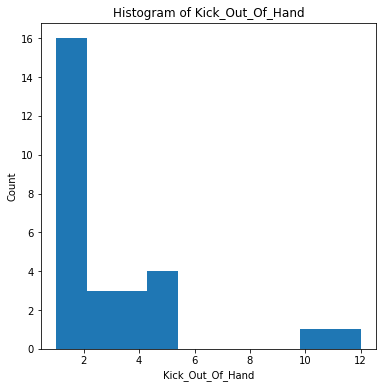

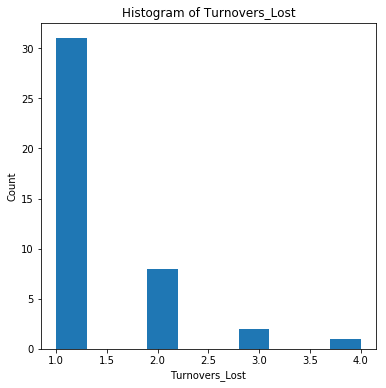

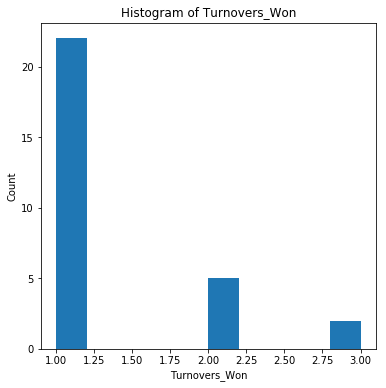

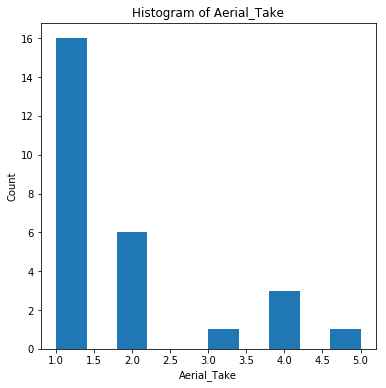

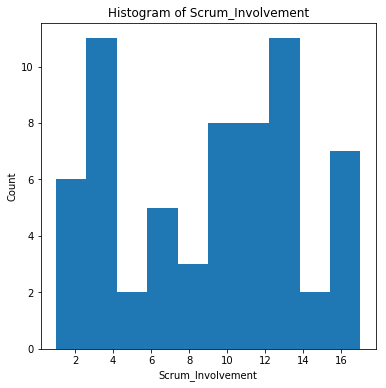

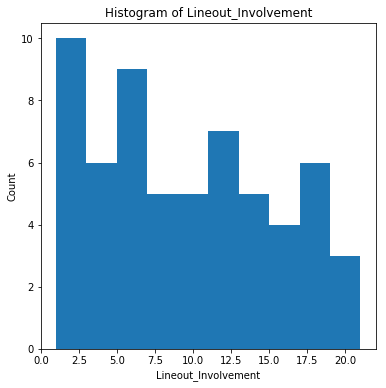

In [6]:
## Visualize Distributions w/ 1 Dimensional Plots
#Step 2- Visualize binned distributions of numerical feature variables w/ pandas histograms plot.hist

def plot_histogram(Pstats, cols, bins = 10):
    for col in cols:        # Iterates over list of columns
        fig = plt.figure(figsize=(6,6))    # Figure plot & axes defined using matplotlib
        ax = fig.gca()
        Pstats[col].plot.hist(ax = ax, bins = bins)    # Use plot.hist method from pandas on subset of data frame   
        ax.set_title('Histogram of ' + col)   # Give plot a main title w/ matplotlib
        ax.set_xlabel(col)    # Set x-axis labels w/ matplotlib
        ax.set_ylabel('Count')   # Set y-axis label w/ matplotlib
        plt.show()
        
num_cols = ['Game', 'Games_Played', 'Minutes_Played', 'Meters', 'Involvements', 'Involve-Min', 'Meter-Involve', 
            'Pos_Involv', 'Pos_Involv-Min', 'Pos_Involv_pct', 'Neg_Involv', 'Live_Reload', 
            'Dead_Reload', 'Pass', 'Tips_Pass', 'Axe_Ball', 'Offload', 'Try_Assist', 'Carry', 'Gainline_Carry',
            'Linebreak', 'Defender_Beaten', 'Tackle', 'Positive_Tackle', 'Neutral_Tackle', 'Negative_Tackle',
            'Missed_Tackle', 'Attack_Ruck', 'Defense_Ruck', 'Pain_In_The_Ass', 'Kick', 'Kick_Out_Of_Hand', 
            'Turnovers_Lost', 'Turnovers_Won', 'Aerial_Take', 'Scrum_Involvement', 'Lineout_Involvement']

plot_histogram(Pstats, num_cols)    

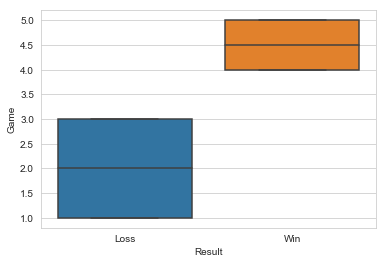

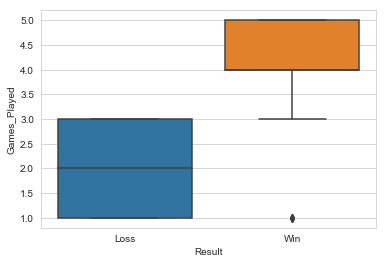

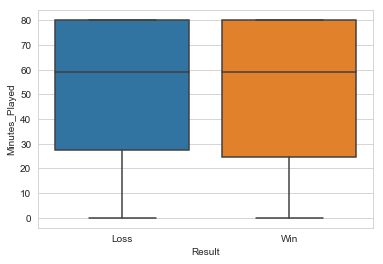

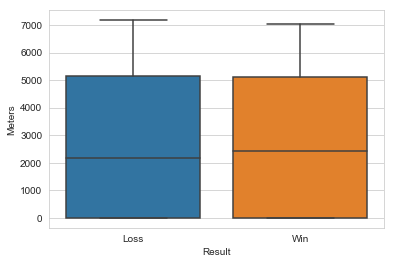

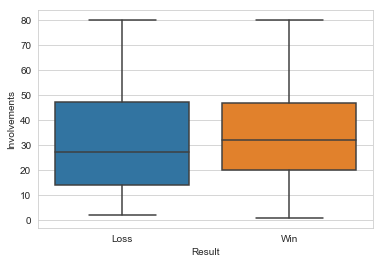

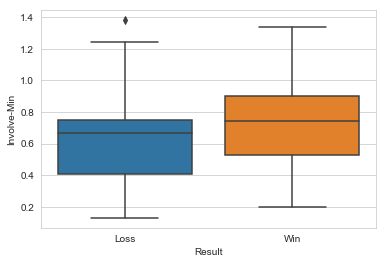

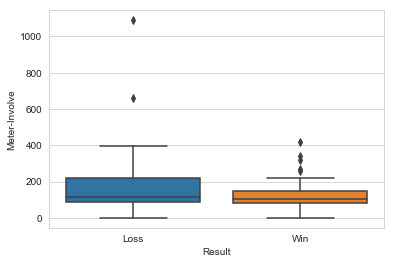

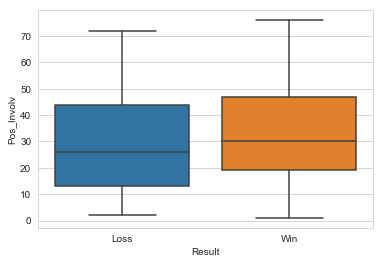

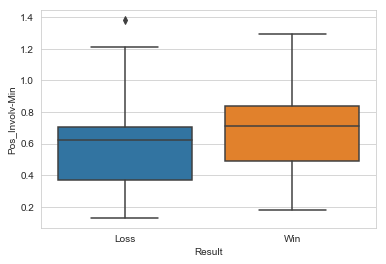

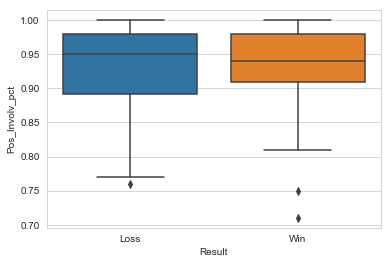

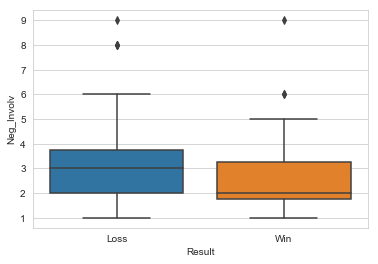

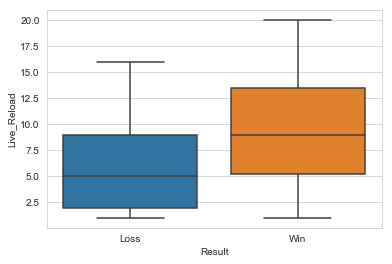

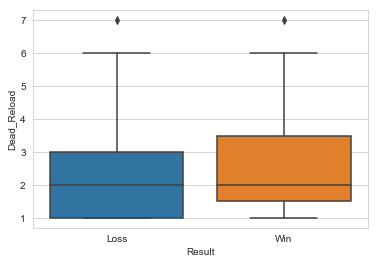

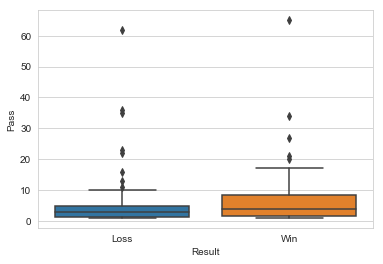

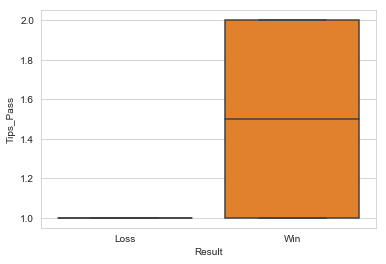

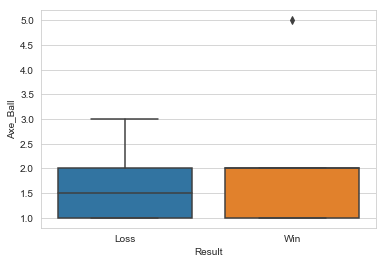

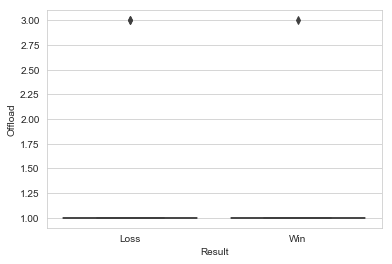

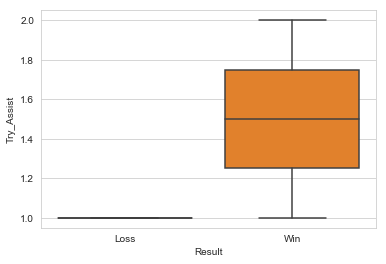

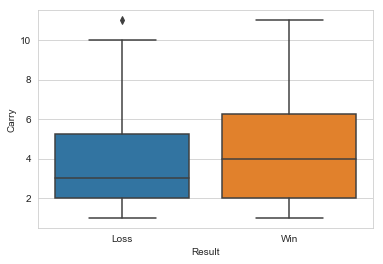

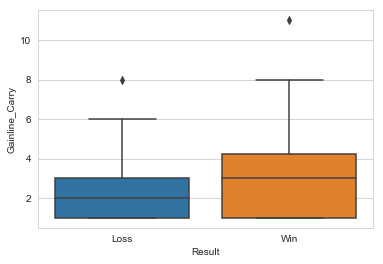

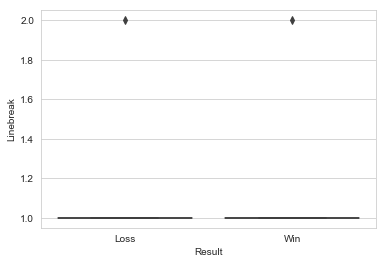

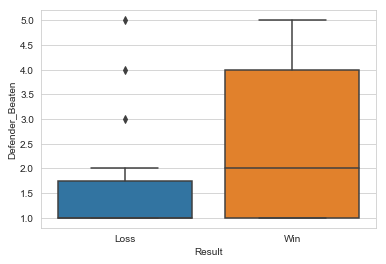

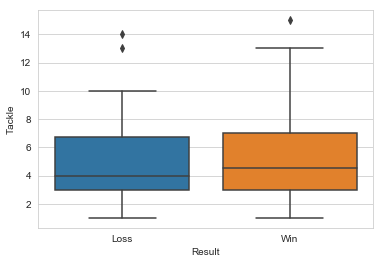

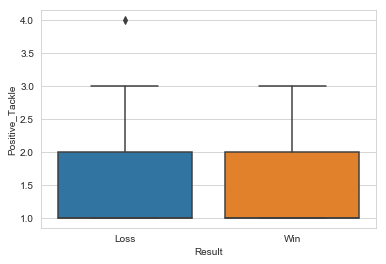

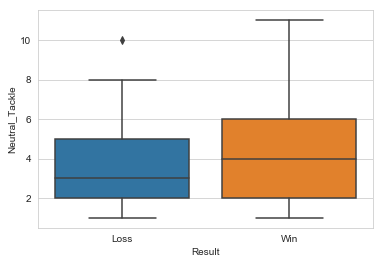

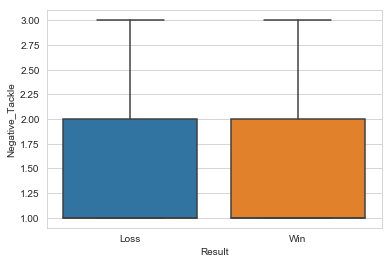

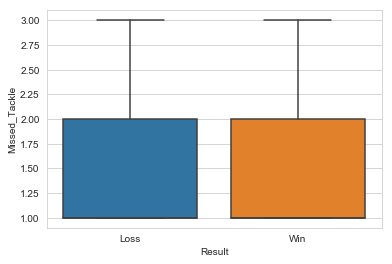

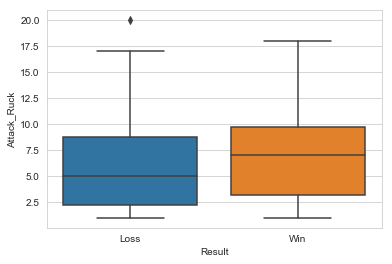

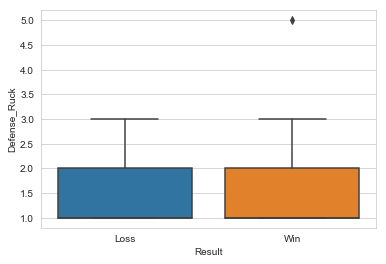

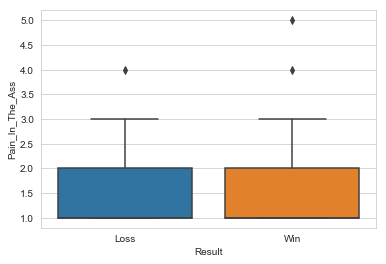

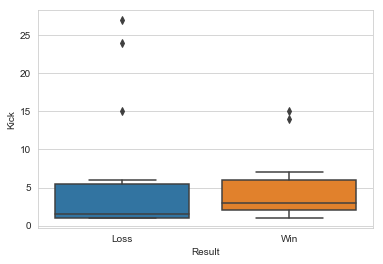

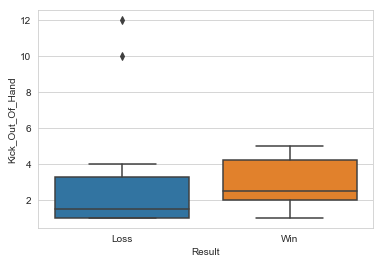

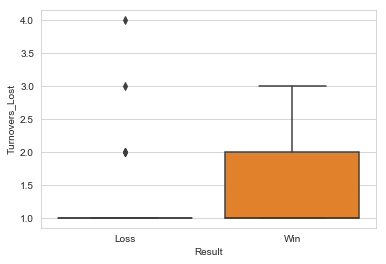

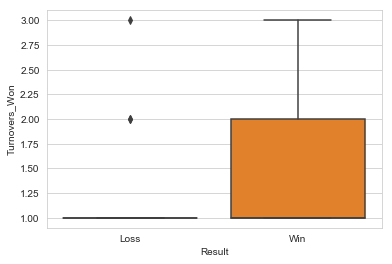

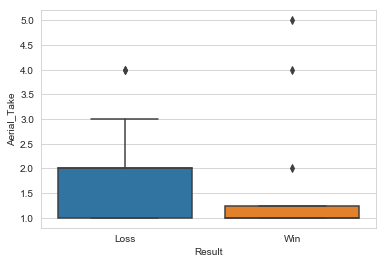

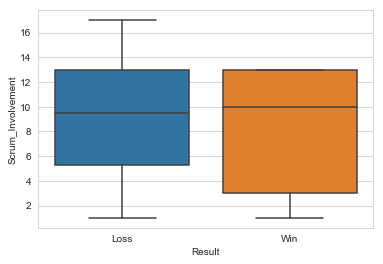

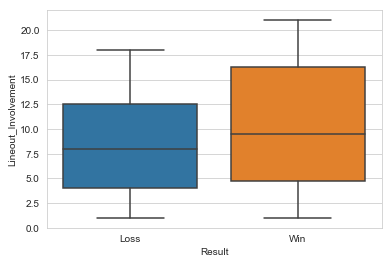

In [8]:
#Below- Visualize Class Separation by Numeric Features

def plot_box(Pstats, cols, col_x = 'Result'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data = Pstats)
        plt.xlabel(col_x)     # Label x-axis
        plt.ylabel(col)     # Label y-axis
        plt.show()
        
num_cols = ['Game', 'Games_Played', 'Minutes_Played', 'Meters', 'Involvements', 'Involve-Min', 'Meter-Involve', 
            'Pos_Involv', 'Pos_Involv-Min', 'Pos_Involv_pct', 'Neg_Involv', 'Live_Reload', 
            'Dead_Reload', 'Pass', 'Tips_Pass', 'Axe_Ball', 'Offload', 'Try_Assist', 'Carry', 'Gainline_Carry',
            'Linebreak', 'Defender_Beaten', 'Tackle', 'Positive_Tackle', 'Neutral_Tackle', 'Negative_Tackle',
            'Missed_Tackle', 'Attack_Ruck', 'Defense_Ruck', 'Pain_In_The_Ass', 'Kick', 'Kick_Out_Of_Hand', 
            'Turnovers_Lost', 'Turnovers_Won', 'Aerial_Take', 'Scrum_Involvement', 'Lineout_Involvement']

plot_box(Pstats, num_cols)

In [9]:
#Below- Plot Categorical & Numerical Varibles w/ Seaborn boxplot
  # Shows inner two quartiles w/in the box. Length of box shows interquartile range.
  # Line w/in box shows median. Whiskers are 1.5 times the interquartile range (extreme values).
  # Outliers are just a symbol

def plot_box(Pstats, cols, col_y = 'Result'):
    for col in cols:   # Iterates over list of columns
        sns.set_style("whitegrid")   # Set style for plot grid
        sns.boxplot(col, col_y, data = Pstats)   # Use boxplot method from seaborn 
        plt.xlabel(col)   # Set x-axis label w/ matplotlib
        plt.ylabel(col_y)   # Set y-axis label w/ matplotlib
        plt.show()
        
cat_cols = ['Player', 'Unit_Position','Position_Group', 'Position', 'Result', 'Jackal', 'Conversion_Made', 'Penalty_Made',
            'Scrum_Attended', 'Scrum_Retained', 'Atk_Scrum_pct', 'Lineout_Attended', 'Lineout_Retained', 'Lineout_pct',
            'Lineout_Stolen', 'Lineout_Disrupted']

plot_box(Pstats, cat_cols)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

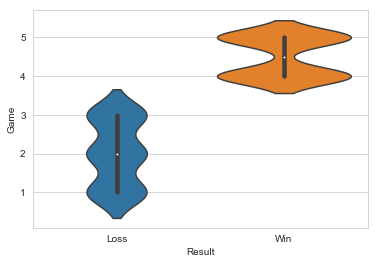

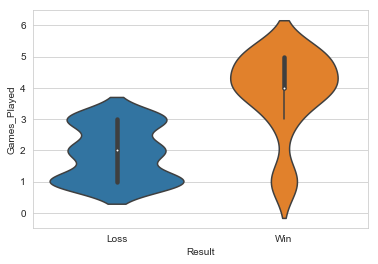

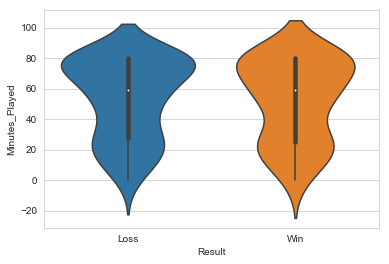

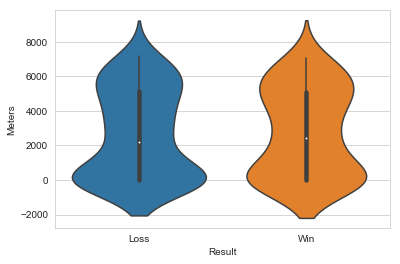

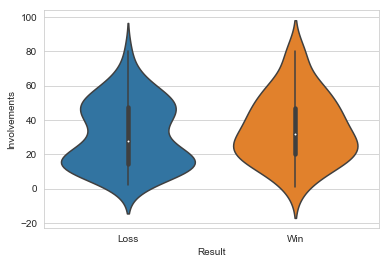

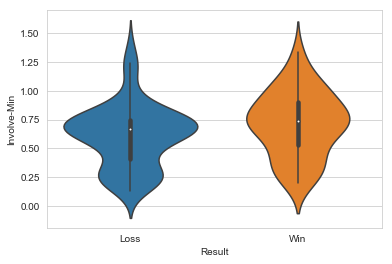

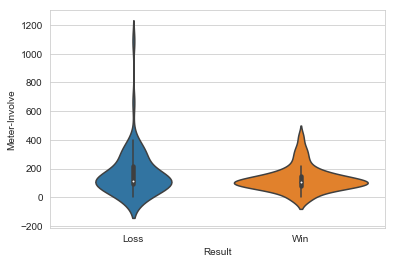

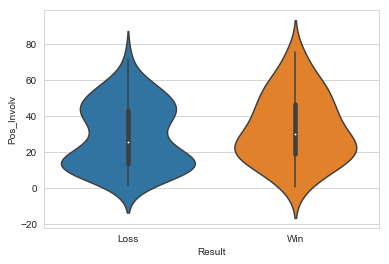

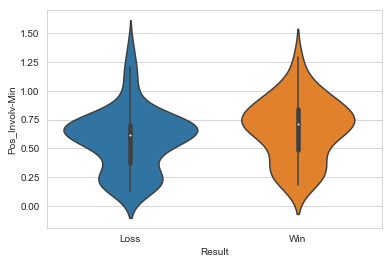

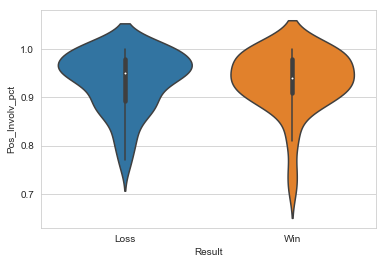

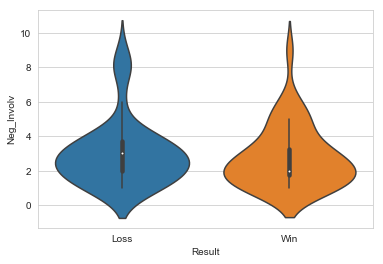

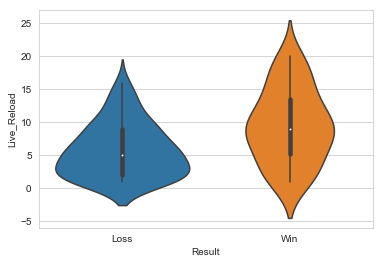

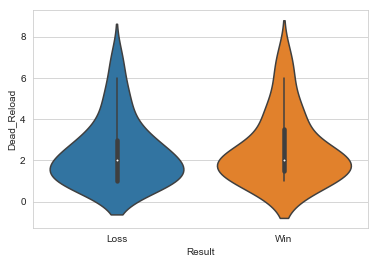

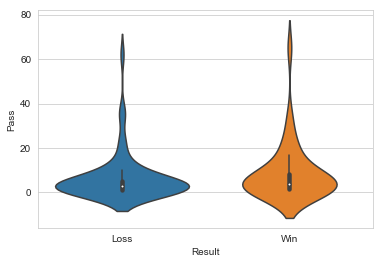

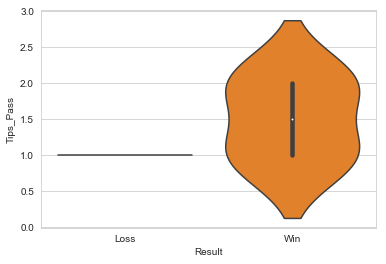

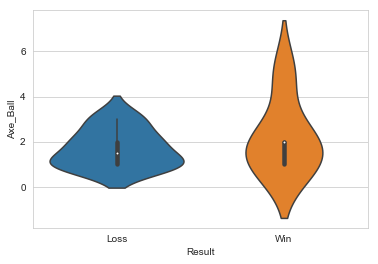

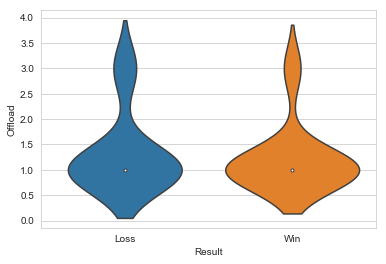

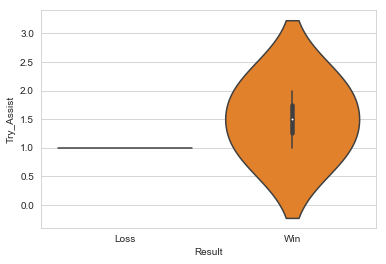

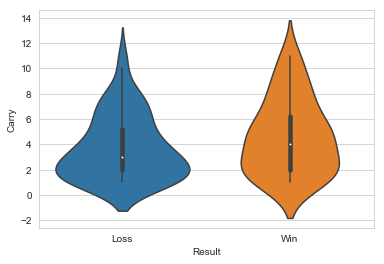

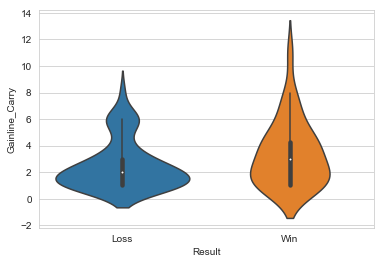

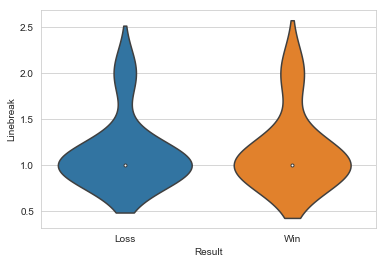

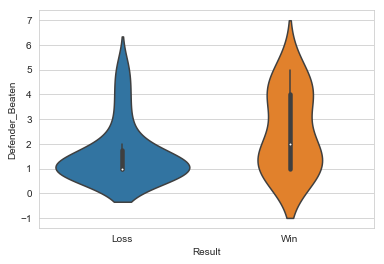

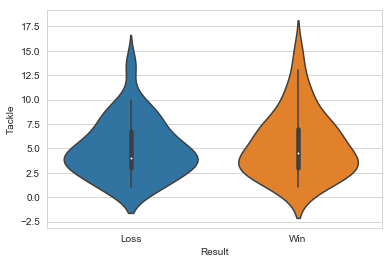

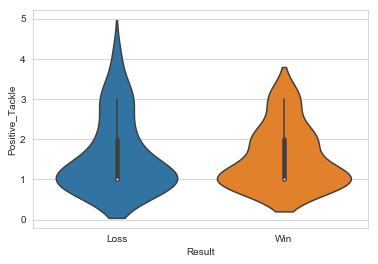

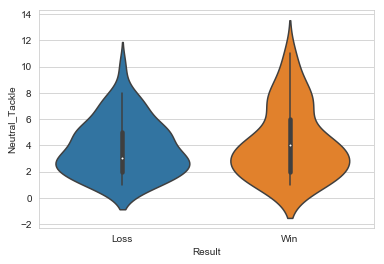

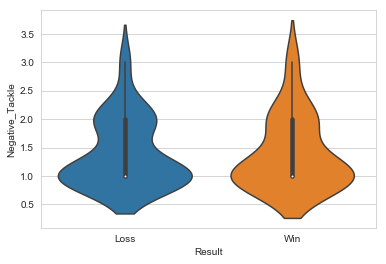

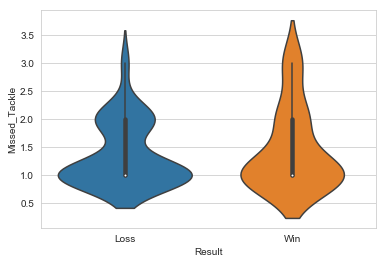

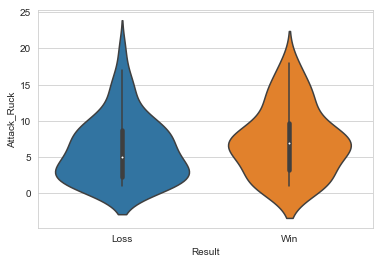

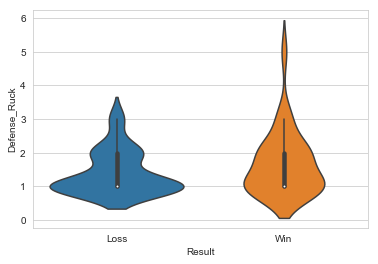

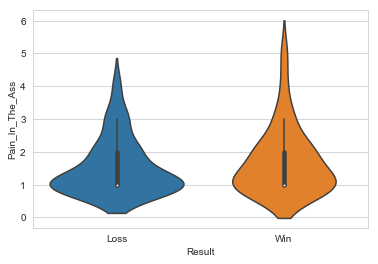

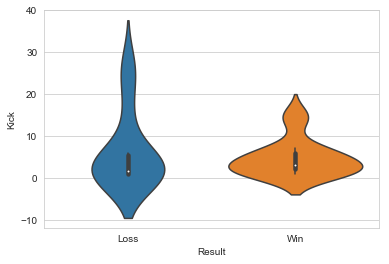

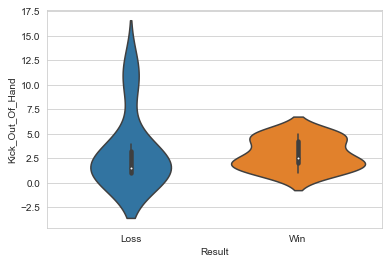

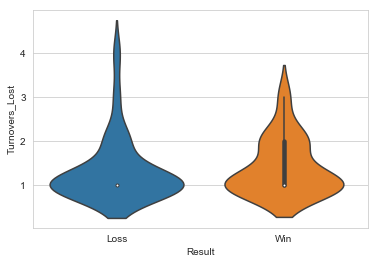

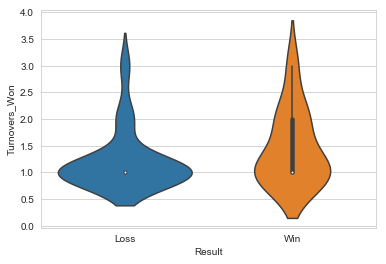

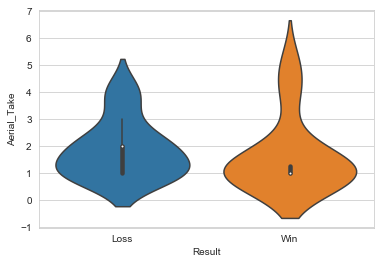

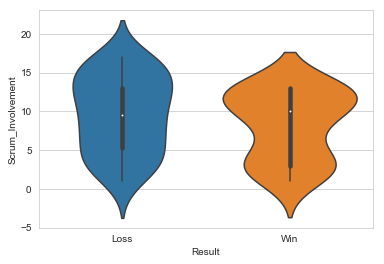

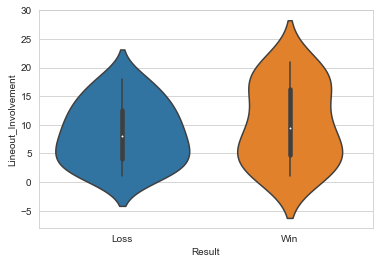

In [10]:
#Below- Violin Plot Visualizations for Numeric Feature Separation

def plot_violin(Pstats, cols, col_x = 'Result'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data = Pstats)
        plt.xlabel(col_x)     #Label x-axis
        plt.ylabel(col)     #Label y-axis
        plt.show()
        
plot_violin(Pstats, num_cols)